<a href="https://colab.research.google.com/github/SebastienLeglise/github-portfolio/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [32]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Load & Explore Data

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  confusion_matrix, classification_report


In [34]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ["pregnancies", "glucose", "blood_pressure", "skin_thickness", "insulin",
                "bmi", "diabetes_pedigree_function", "age", "outcome"]
data = pd.read_csv(url, names=column_names)

   pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0            6      148              72              35        0  33.6   
1            1       85              66              29        0  26.6   
2            8      183              64               0        0  23.3   
3            1       89              66              23       94  28.1   
4            0      137              40              35      168  43.1   

   diabetes_pedigree_function  age  outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
       pregnancies     glucose  blood_pressure  skin_thickness     insulin  \
count   768.000000  768.000000      768.000000      768.000000  768.000000   
mean      3.845052  120.894531       69.105469       20.536458   79.799479   
std       3.369578   31.972618       19.35580

<function matplotlib.pyplot.show(close=None, block=None)>

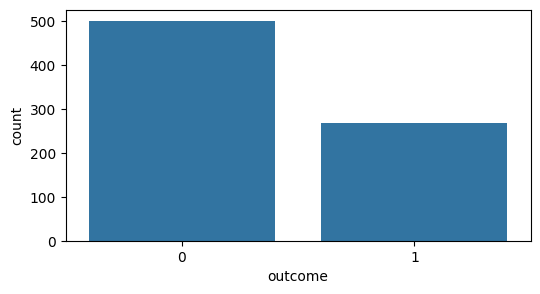

In [35]:
#show data
print(data.head())
print(data.describe())
print(f"Distribution des classes: \n{data['outcome'].value_counts()}")
plt.figure(figsize=(6,3))
sns.countplot(x = 'outcome', data = data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

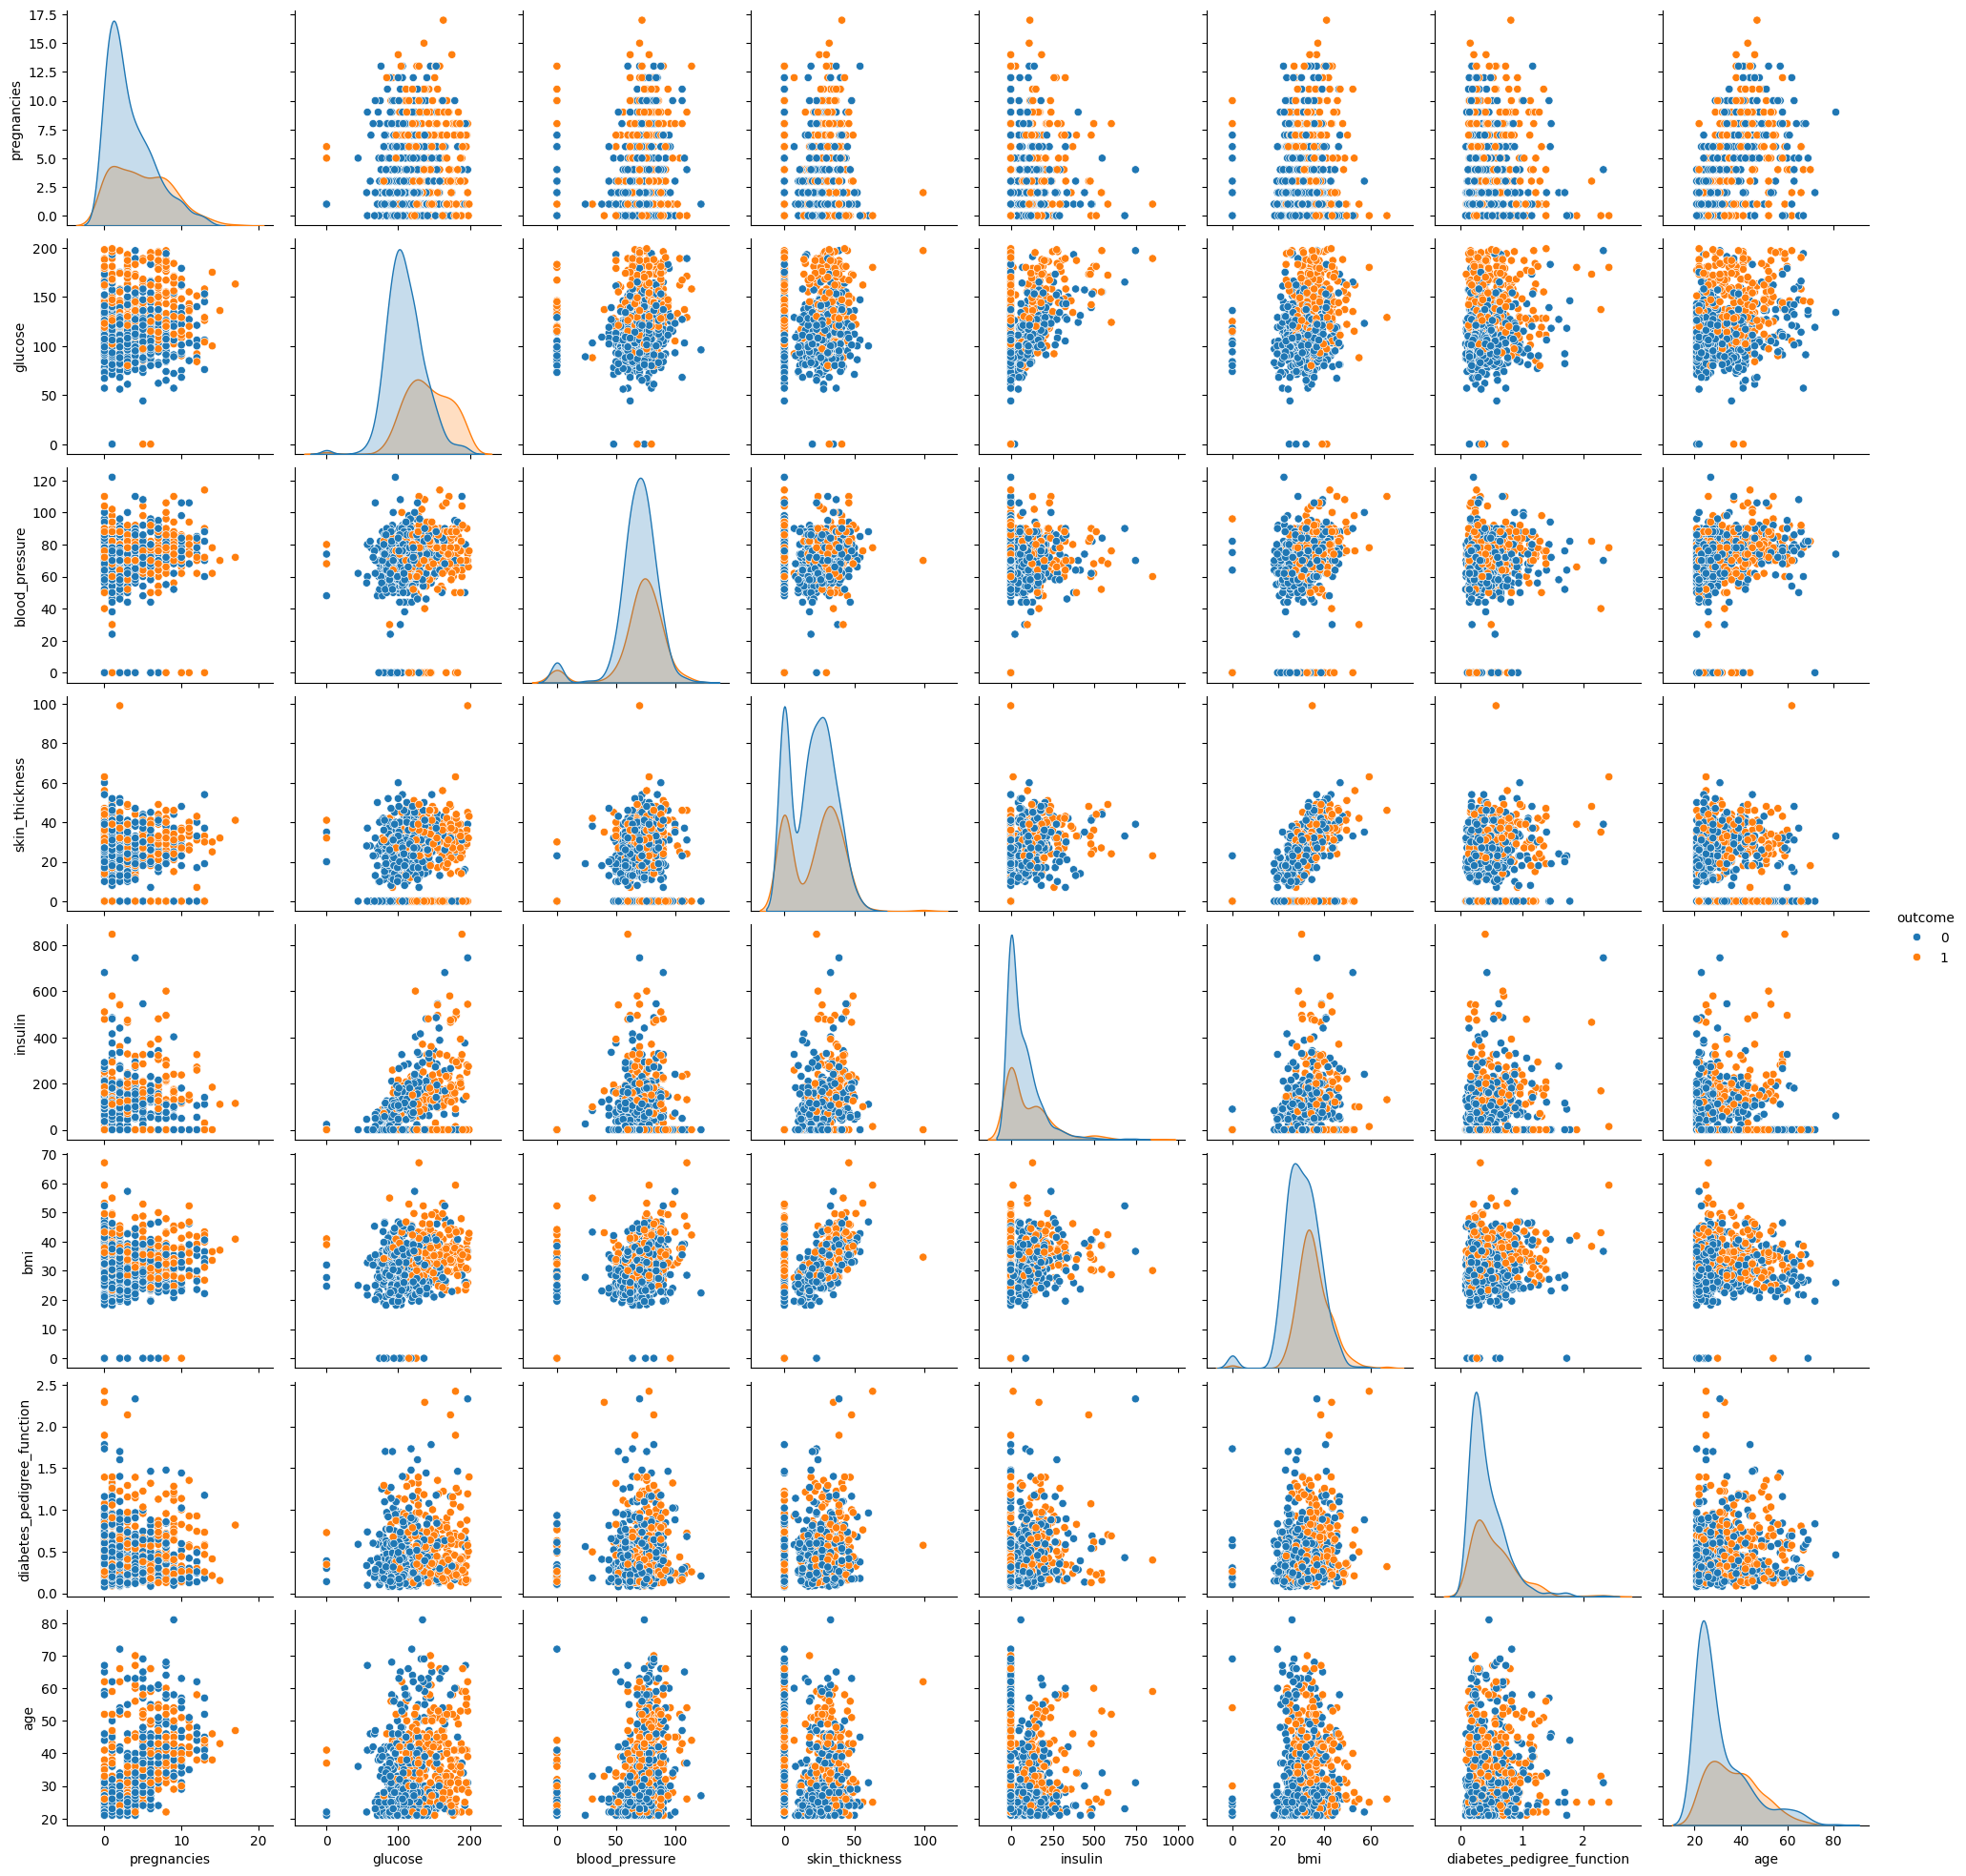

In [36]:
sns.pairplot(data, hue='outcome')
plt.show




1.   Glucose Distribution and Outcome

Shift to Higher Glucose: The orange curve (diabetic, outcome = 1) is clearly shifted to the right of the blue curve (non-diabetic, outcome = 0), indicating that higher glucose values are more common among diabetic individuals.
Separation in Scatter Plots: In the scatter plots involving glucose (e.g., glucose vs. BMI, glucose vs. insulin), the orange points cluster more frequently in the upper ranges, reinforcing the idea that glucose is a strong differentiator.

2.   BMI (Body Mass Index)

Higher BMI for Diabetics: Similar to glucose, the BMI distribution for the diabetic group tends to be higher on the diagonal density plots.
Positive Relationships: In pairwise scatter plots (e.g., BMI vs. insulin), there is a visible upward trend: individuals with higher BMI often have higher insulin levels, which again is more common in the diabetic subset.

3.  Skin Thickness and Insulin

Positive Correlation: The scatter plot of skin_thickness vs. insulin shows a generally increasing trend. As skin thickness goes up, insulin levels also tend to increase.
Broader Range for Diabetics: Diabetic individuals (orange) appear across a broader range of both skin thickness and insulin, possibly suggesting a more varied physiological profile.


4.   Blood Pressure and Other Variables

Moderate Patterns: Blood pressure does not show as clear a separation between diabetic and non-diabetic groups as glucose or BMI. Nonetheless, individuals with elevated blood pressure often coincide with higher glucose or BMI levels, indicating a possible compounding effect.


5.   Pregnancies and Age

Skewed Distribution: The distribution of pregnancies is skewed, with most individuals having relatively few pregnancies, but a small number having significantly more.
Age Factor: Although not as stark as glucose or BMI, higher age sometimes aligns with more pregnancies and, in certain cases, with higher glucose/BMI levels—potentially contributing to the risk of diabetes.


6.   Diabetes Pedigree Function

Genetic Influence: The diabetes_pedigree_function variable shows that some individuals (particularly in the orange group) have relatively high values, hinting at a stronger familial or genetic predisposition to diabetes.


7.   Overall Observations

* Key Predictors: Glucose, BMI, and insulin appear to be the most visually distinct variables when separating diabetic vs. non-diabetic groups.

* Combination Effects: In many of the scatter plots, having multiple risk factors (e.g., high BMI plus high glucose) correlates strongly with being in the diabetic group.

* Potential Outliers: A few points show extremely high insulin or glucose values; understanding these points could be important in building a robust predictive model or in clarifying the data (e.g., data entry errors vs. genuine outliers).


Putting it all together, we see that individuals with higher glucose, BMI, and insulin levels are more frequently associated with the diabetic outcome. Although blood pressure, skin thickness, and pregnancies also show some differentiation, they appear less distinctly separated in this visualization.

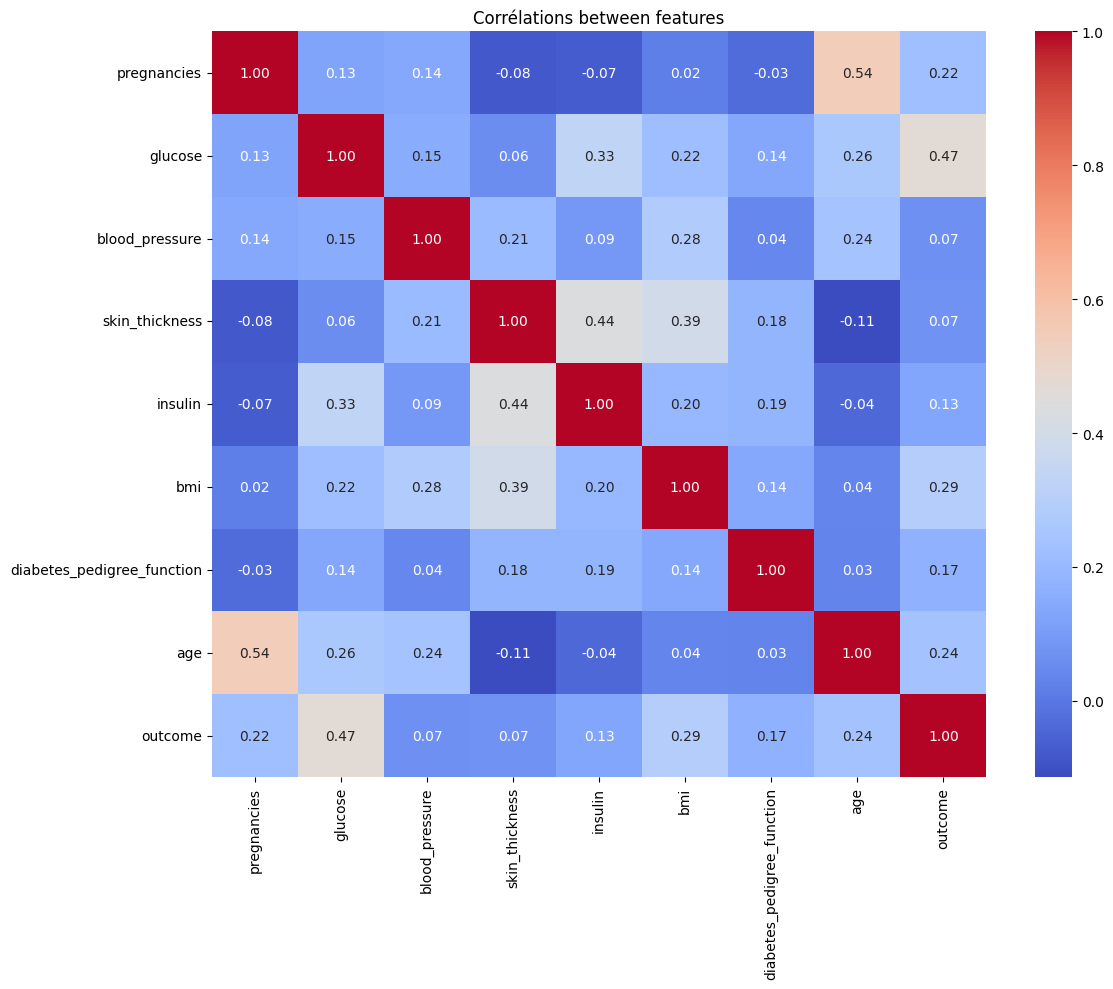

In [37]:
#visualize correlations
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Corrélations between features')
plt.tight_layout()

One of the most notable relationships is between pregnancies and age, which exhibit a correlation coefficient of approximately 0.54. This relatively strong positive correlation is intuitive since older individuals are likely to have experienced more pregnancies over time. In contrast, the blood_pressure feature shows a very low correlation (around 0.07) with the diabetes outcome, suggesting that, on its own, blood pressure is not a significant predictor of diabetes in this dataset.

Another interesting observation is the relationship between skin_thickness and insulin, which has a correlation of around 0.44. This moderate positive relationship indicates that as skin thickness increases, insulin levels tend to increase as well, hinting at an underlying physiological connection between these measurements. Similarly, BMI (Body Mass Index) is moderately correlated with both skin thickness (around 0.39) and the diabetes outcome (approximately 0.29). These findings suggest that higher BMI values are associated with both increased skin thickness and a greater likelihood of diabetes, reinforcing the role of obesity as a risk factor.

Perhaps the most significant predictor, as indicated by the correlation matrix, is glucose. Glucose shows a correlation of approximately 0.47 with the diabetes outcome, which is the highest among all the features. This strong positive correlation confirms that elevated glucose levels are highly indicative of the presence of diabetes, making it a critical variable for any predictive model.

Lastly, other features such as diabetes_pedigree_function have relatively low correlations with both the outcome and other variables, implying that while it may contribute unique information to the model, its individual predictive power might be limited compared to features like glucose or BMI.



# Split Dataset & Feature Scaling

In [47]:
#Splitting datasets into training(75%) and testing(25%)
X = data.drop('outcome', axis=1)
X = np.array(X)
y = data['outcome']
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [48]:
#Scaling the data(feature scaling)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Build a Model

In [49]:
#knn

# Tuning hyperparameter


param_grid_knn = {
    'n_neighbors': list(range(1, 50)),  # Test k from 1 to 50
    'weights': ['uniform', 'distance'],  # Test both weight options
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Test distance metrics
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

y_train_knn = y_train
X_train_knn = X_train
#5-fold cross-validation
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_knn.fit(X_train_knn, y_train_knn)

# Retrieve best hyperparameters
best_params = grid_search_knn.best_params_
print("Best Hyperparameters for KNN:", best_params)



# Train best KNN model
best_knn = grid_search_knn.best_estimator_
best_knn.fit(X_train_knn, y_train_knn)
best_knn.score(X_test, y_test)

Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 27, 'p': 1, 'weights': 'uniform'}


0.7083333333333334

# Performance Evaluation

[[117  11]
 [ 35  29]]


<Axes: >

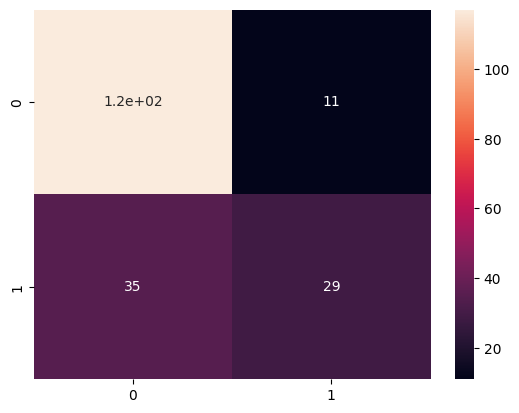

In [29]:
#plot confusion matrix

y_pred_knn = best_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)
sns.heatmap(cm, annot=True)

The KNN model shows a mixed performance, with a clear strength in predicting class 0, as evidenced by 117 True Positives and 29 True Negatives. However, it struggles with class 1, reflected in 35 False Negatives and 11 False Positives. The overall accuracy of the model is 76%, but its performance on class 1 is limited, with a Precision of 72.5% and a Recall of 45.3%, indicating that it misses many actual class 1 cases. The F1-score of 0.555 highlights this imbalance, suggesting the need for improvement. To enhance performance, trying models like RandomForest or XGBoost, adjusting feature selection or scaling, and addressing any dataset imbalance could help mitigate the model's shortcomings in detecting class 1 instances.

In [26]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       128
           1       0.72      0.45      0.56        64

    accuracy                           0.76       192
   macro avg       0.75      0.68      0.70       192
weighted avg       0.75      0.76      0.74       192

